## TO-DO

- Handling of dummy nodes (user-input vs. package configuration and algorithm modification
- Construct parameter dictionary for pyomo concrete instances
- Fix order of model construction to remain as Abstract until create_instance() called (issue with initializing Sets then calling constraints)
- Combine overlapping nodes in plotly with text and hover so no text overlap

In [1]:
%load_ext autoreload
%autoreload 2

In [289]:
from evrp.utils.utilities import parse_csv_tables, calculate_distance_matrix, generate_index_mapping, create_plotting_edges, create_flat_distance_matrix, create_coordinate_dict
from evrp.utils.graph import draw_plain_graph, draw_graph
from evrp.utils.plot import plot_interactive_graph
from evrp.milp.model import MILP

import pandas as pd
import numpy as np
from scipy.spatial import distance

import pprint

import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.colors as pltc

import itertools

import networkx as nx

pd.options.plotting.backend = "plotly"
pp = pprint.PrettyPrinter()

In [33]:
instance = 'test1_D1S3C10_TSP'
fpath = 'config/test_instances/' + instance + '.csv'

In [480]:
m = MILP(fpath)

2020-09-19 02:56:33 INFO     Building MILP for instance: test1_D1S3C10_TSP
2020-09-19 02:56:33 INFO     Reading CSV
2020-09-19 02:56:33 INFO     Creating graph
2020-09-19 02:56:33 INFO     Calculating distance matrix
2020-09-19 02:56:33 INFO     Building model
2020-09-19 02:56:33 INFO     Defining parameters and sets
2020-09-19 02:56:33 INFO     Defining variables
2020-09-19 02:56:33 INFO     Defining constraints
2020-09-19 02:56:33 INFO     Defining objective
2020-09-19 02:56:33 INFO     Construcing model
2020-09-19 02:56:33 INFO     Done building model


In [481]:
results = m.solve()

2020-09-19 02:56:35 INFO     Creating instance
2020-09-19 02:56:35 INFO     Solving instance...
2020-09-19 02:56:35 INFO     Parameter OutputFlag unchanged
2020-09-19 02:56:35 INFO        Value: 1  Min: 0  Max: 1  Default: 1
2020-09-19 02:56:35 INFO     Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmp0twalpdc.log
2020-09-19 02:56:35 INFO        Prev:   Default: 
2020-09-19 02:56:35 INFO     Changed value of parameter threads to 4
2020-09-19 02:56:35 INFO        Prev: 0  Min: 0  Max: 1024  Default: 0
2020-09-19 02:56:35 INFO     Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
2020-09-19 02:56:35 INFO     Optimize a model with 212 rows, 239 columns and 964 nonzeros
2020-09-19 02:56:35 INFO     Model fingerprint: 0xba04eda9
2020-09-19 02:56:35 INFO     Variable types: 0 continuous, 239 integer (225 binary)
2020-09-19 02:56:35 INFO     Coefficient statistics:
2020-09-19 02:56:35 INFO       Matrix range     [1e+00, 2e+01]
2020-09-19 02:56:35 

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmp0twalpdc.log
   Prev:   Default: 
Changed value of parameter threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 212 rows, 239 columns and 964 nonzeros
Model fingerprint: 0xba04eda9
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e+00, 7e+01]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 1e+01]
Presolve removed 0 rows and 15 columns
Presolve time: 0.01s
Presolved: 212 rows, 224 columns, 964 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)
Found heuristic solution: objective 538.7175802

Root relaxation: objective 1.361608e+02, 60 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Un

In [482]:
m.m.pprint()

14 Set Declarations
    E : Graph edges
        Dim=0, Dimen=2, Size=225, Domain=E_domain, Ordered=False, Bounds=None
        [('d-1', 'd-1'), ('d-1', 'd0'), ('d-1', 'm1'), ('d-1', 'm10'), ('d-1', 'm2'), ('d-1', 'm3'), ('d-1', 'm4'), ('d-1', 'm5'), ('d-1', 'm6'), ('d-1', 'm7'), ('d-1', 'm8'), ('d-1', 'm9'), ('d-1', 's1'), ('d-1', 's2'), ('d-1', 's3'), ('d0', 'd-1'), ('d0', 'd0'), ('d0', 'm1'), ('d0', 'm10'), ('d0', 'm2'), ('d0', 'm3'), ('d0', 'm4'), ('d0', 'm5'), ('d0', 'm6'), ('d0', 'm7'), ('d0', 'm8'), ('d0', 'm9'), ('d0', 's1'), ('d0', 's2'), ('d0', 's3'), ('m1', 'd-1'), ('m1', 'd0'), ('m1', 'm1'), ('m1', 'm10'), ('m1', 'm2'), ('m1', 'm3'), ('m1', 'm4'), ('m1', 'm5'), ('m1', 'm6'), ('m1', 'm7'), ('m1', 'm8'), ('m1', 'm9'), ('m1', 's1'), ('m1', 's2'), ('m1', 's3'), ('m10', 'd-1'), ('m10', 'd0'), ('m10', 'm1'), ('m10', 'm10'), ('m10', 'm2'), ('m10', 'm3'), ('m10', 'm4'), ('m10', 'm5'), ('m10', 'm6'), ('m10', 'm7'), ('m10', 'm8'), ('m10', 'm9'), ('m10', 's1'), ('m10', 's2'), ('m10', 's

2020-09-17 20:06:23 INFO     
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 120
Average degree:  16.0000


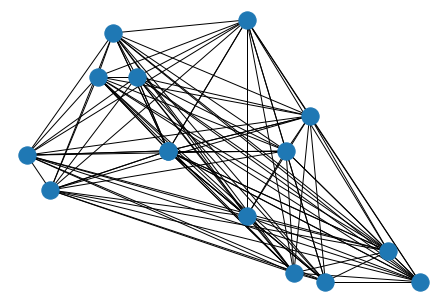

In [28]:
draw_plain_graph(m.data['V'], m.data['d'])

2020-09-17 20:06:26 INFO     
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 120
Average degree:  16.0000


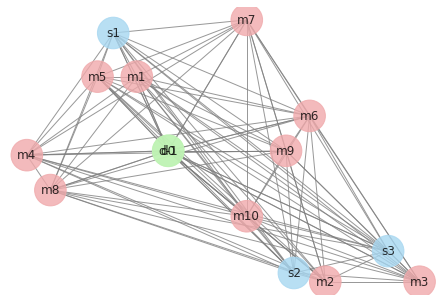

In [29]:
draw_graph(m.data['V'], m.data['d'])

In [231]:
plot_interactive_graph(m.data['V'], m.data['d'])

In [ ]:
# m.m.construct()
# [(i,j) for i,j in m.m.xgamma.items()]

In [483]:
print('{}'.format(m.m.pprint()))

14 Set Declarations
    E : Graph edges
        Dim=0, Dimen=2, Size=225, Domain=E_domain, Ordered=False, Bounds=None
        [('d-1', 'd-1'), ('d-1', 'd0'), ('d-1', 'm1'), ('d-1', 'm10'), ('d-1', 'm2'), ('d-1', 'm3'), ('d-1', 'm4'), ('d-1', 'm5'), ('d-1', 'm6'), ('d-1', 'm7'), ('d-1', 'm8'), ('d-1', 'm9'), ('d-1', 's1'), ('d-1', 's2'), ('d-1', 's3'), ('d0', 'd-1'), ('d0', 'd0'), ('d0', 'm1'), ('d0', 'm10'), ('d0', 'm2'), ('d0', 'm3'), ('d0', 'm4'), ('d0', 'm5'), ('d0', 'm6'), ('d0', 'm7'), ('d0', 'm8'), ('d0', 'm9'), ('d0', 's1'), ('d0', 's2'), ('d0', 's3'), ('m1', 'd-1'), ('m1', 'd0'), ('m1', 'm1'), ('m1', 'm10'), ('m1', 'm2'), ('m1', 'm3'), ('m1', 'm4'), ('m1', 'm5'), ('m1', 'm6'), ('m1', 'm7'), ('m1', 'm8'), ('m1', 'm9'), ('m1', 's1'), ('m1', 's2'), ('m1', 's3'), ('m10', 'd-1'), ('m10', 'd0'), ('m10', 'm1'), ('m10', 'm10'), ('m10', 'm2'), ('m10', 'm3'), ('m10', 'm4'), ('m10', 'm5'), ('m10', 'm6'), ('m10', 'm7'), ('m10', 'm8'), ('m10', 'm9'), ('m10', 's1'), ('m10', 's2'), ('m10', 's

In [484]:
c = create_coordinate_dict(m.data['V'])

e = pd.DataFrame([(*k, v()) for k, v in m.m.xgamma.items()])
e.rename({0:'from', 1:'to', 2:'state'}, axis=1, inplace=True)
e['from_d_x'], e['from_d_y'] = np.vstack([c[e] for e in e['from']]).T
e['to_d_x'], e['to_d_y'] =  np.vstack([c[e] for e in e['to']]).T
e = e[e['state']==1]
# e = e.pivot(index='from', columns='to', values='state')

In [485]:
plot_interactive_graph(m.data['V'], e=e)

In [457]:
e


,from,to,state,from_d_x,from_d_y,to_d_x,to_d_y
